# **Imputación de datos inicial para su posterior análisis**

Este notebook genera la versión limpia y completa de la base de datos, luego de aplicar procesos de imputación y validación de datos faltantes o inconsistentes. En él se consolidan todas las variables necesarias para entender el comportamiento de atención en la sucursal, incluyendo información temporal, segmentación de usuarios, tiempos de espera y servicio, así como el estado final de cada caso. Esta base es la que se utilizará para todos los análisis posteriores, modelamiento y generación de estrategias, ya que aquí es donde se garantiza la integridad, coherencia y representatividad de los datos, evitando errores en los próximos análisis.


In [1]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de fechas y tiempo
from datetime import datetime, timedelta

In [ ]:
from scipy import stats           
import plotly.express as px       

In [3]:
dataframe = pd.read_csv('../files/input/Datos_Sucursal.csv')
dataframe.head(10)

,year,mes,dia,hora,usuario_encriptado,tipo_servicio,servicio,sub_servicio,tiempo_espera,tiempo_servicio,segm,estado_caso,asesor_encriptado
0,2024,1,2,15:34:36.593,20aed4d067c167cbddd3068cc704ff0068bfaef2c1186f...,Asesoria,Asesoria General,Asesoria General,34.466667,12.350000,Personal,Completado,d59d2bb716c503bcb87ea049ef9b5b04c85ddee9731254...
1,2024,1,2,10:41:01.21,2633c62c47bcb340cdc26b1a8275882a53abd7ba26e53f...,Caja,Caja Preferencial,Caja Preferencial- Prioritaria,95.083333,9.950000,Personal Plus,Completado,09c9a38a05f3d4da9e50171d4bb427f41d6ea41c36033a...
2,2024,1,2,10:32:09.927,7ddd4eba0e042e4f871fe07bfa3a3583b87742cd9e75d0...,Caja,Caja Turnos,Caja Turnos,79.033333,15.783333,Personal Plus,Completado,fcb5913f0c577ecc93ab6faa2b7570b5da0e7368be5500...
3,2024,1,2,16:53:11.423,d17eacbf24cc24c5cbf46802a4fde31a105b8bcf48dee1...,Caja,Caja General,Caja General,64.200000,NaN,Personal Plus,Abandonado,6024bbfafbaf5e532869e12cbd5c035f0913a6f329a89e...
4,2024,1,2,12:05:27.163,dcbda5f62dc9fd403e14293616101db34cdd730467d341...,Caja,Caja General,Caja General,158.683333,NaN,Micropyme,Abandonado,b1a5fa46436fa2cd8f9b66d10762c25e780d956fef140a...
5,2024,1,2,11:13:48.2,32e9a5f30076851341708ec0e696b3e15c8c121266c1a3...,Asesoria,Asesoria General,Asesoria General,18.966667,29.300000,Personal Plus,Completado,94c3e593da40d88fba9d15fbabe8e8739ef48b43977cb0...
6,2024,1,2,11:48:36.887,NaN,Asesoria,Asesoria General,Asesoria General,71.866667,NaN,NaN,Abandonado,0ab716b5568ea21c8e27bb2a9718e54fbae14db05bdd9c...
7,2024,1,2,11:37:45.423,6c1367153a9b7028ed4c57a894eb0c8812cf37f6867dfa...,Caja,Caja General,Caja General,141.833333,NaN,Personal,Abandonado,7e177fbd1bc426c39382bfe3e9e4fd8bd544331e40c258...
8,2024,1,2,13:57:15.933,NaN,Asesoria,Asesoria General,Asesoria General,4.233333,13.166667,NaN,Completado,d347d63c9410d8f5ec7b0bd9da76259be4e70dfce00d2a...
9,2024,1,2,12:36:12.567,e43a176c4bf7c866abfe6842a393e361b99d910c9afb24...,Asesoria,Asesoria Turnos,Asesoria Turnos,38.833333,NaN,Personal,Abandonado,8e3150ffcb983a3f2f670c6e136bd826b93bf78ea62f79...


In [4]:
dataframe = dataframe.rename(columns={"mes": "month", "dia": "day"})

In [5]:
dataframe.shape

(100000, 13)

In [6]:
dataframe.isnull().sum()

year                      0
month                     0
day                       0
hora                      0
usuario_encriptado     7127
tipo_servicio             0
servicio                 23
sub_servicio              0
tiempo_espera            94
tiempo_servicio       19948
segm                   7129
estado_caso               0
asesor_encriptado        99
dtype: int64

Analizar con PySpqrk y SQL (noteboob-pyspark.ipynb) las clases distintas que hay en cada campo con nulos para indentificar su manera de imputación, si es posible o no hacerla.

De esta manera, tendríamos que el tiempo de espera, por su bajo porcentaje de nulos se podría imputar con una interpolación lineal, es muy poco probable que introduzca sesgos con tan pocos nulos. Para utilizar la interpolación es necesario que los datos estén ordenados temporalmente, lo cual es correcto al momento de observarlos.

In [7]:
dataframe['tiempo_espera'].interpolate(method='linear', inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_16412\1083920533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['tiempo_espera'].interpolate(method='linear', inplace=True)


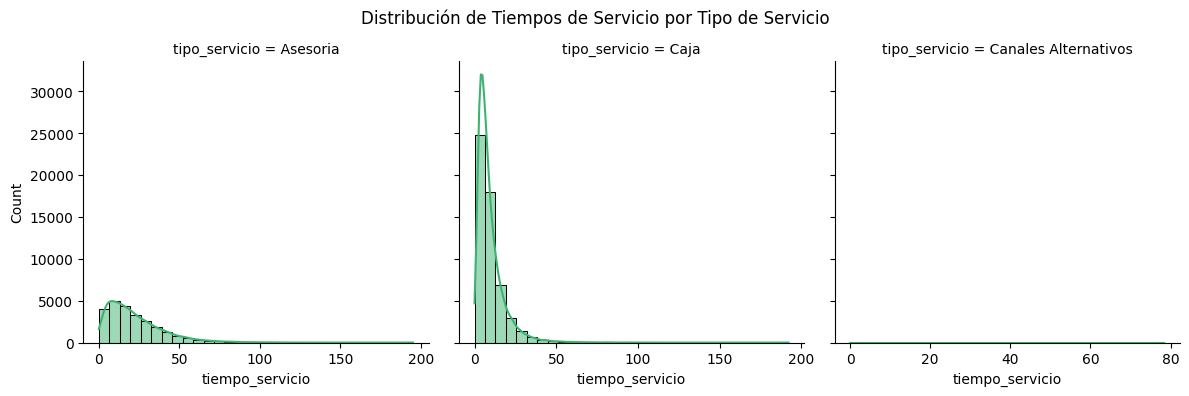

In [8]:
# Filtrar datos válidos (no nulos) para 'tiempo_servicio' y 'tipo_servicio'
df_filtrado = dataframe[(dataframe['tiempo_servicio'].notnull()) & (dataframe['tipo_servicio'].notnull())]

g = sns.FacetGrid(df_filtrado, col="tipo_servicio", col_wrap=3, height=4, sharex=False)
g.map(sns.histplot, "tiempo_servicio", bins=30, kde=True, color='mediumseagreen')

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución de Tiempos de Servicio por Tipo de Servicio")
plt.show()

In [9]:
# Imputar con la mediana de tiempo_servicio para cada 'tipo_servicio'
dataframe['tiempo_servicio'] = dataframe.groupby(['tipo_servicio'])['tiempo_servicio'].transform(lambda x: x.fillna(x.median()))

In [10]:
# Imputaciones adicionales: 
dataframe['segm'].fillna('Sin Segm', inplace=True)
dataframe['usuario_encriptado'].fillna('Sin Registro', inplace=True)
dataframe['asesor_encriptado'].fillna('Sin Registro', inplace=True)
dataframe['servicio'].fillna('Sin Registro', inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_16412\2463031243.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['segm'].fillna('Sin Segm', inplace=True)
C:\Users\julia\AppData\Local\Temp\ipykernel_16412\2463031243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [11]:
dataframe.isnull().sum()

year                  0
month                 0
day                   0
hora                  0
usuario_encriptado    0
tipo_servicio         0
servicio              0
sub_servicio          0
tiempo_espera         0
tiempo_servicio       0
segm                  0
estado_caso           0
asesor_encriptado     0
dtype: int64

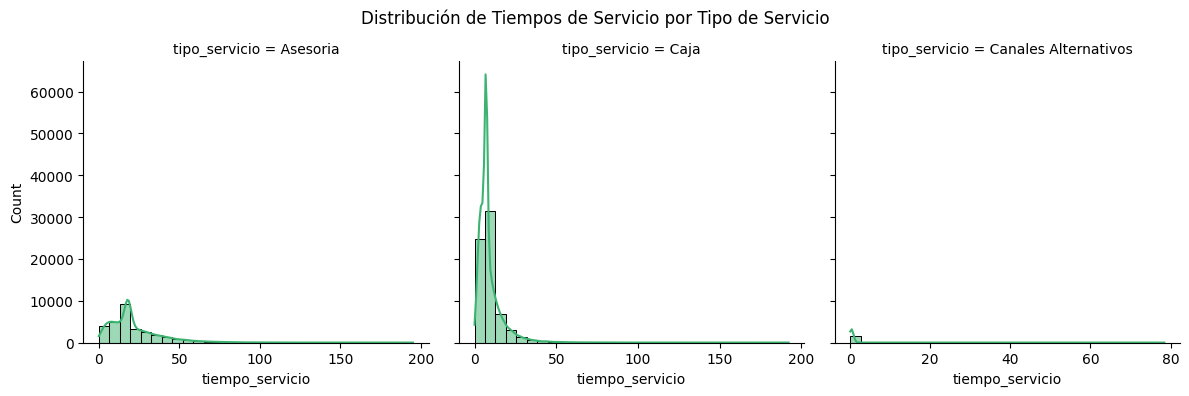

In [12]:
# Filtrar datos válidos (no nulos) para 'tiempo_servicio' y 'tipo_servicio'
df_filtrado = dataframe[(dataframe['tiempo_servicio'].notnull()) & (dataframe['tipo_servicio'].notnull())]

g = sns.FacetGrid(df_filtrado, col="tipo_servicio", col_wrap=3, height=4, sharex=False)
g.map(sns.histplot, "tiempo_servicio", bins=30, kde=True, color='mediumseagreen')

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución de Tiempos de Servicio por Tipo de Servicio")
plt.show()

In [13]:
dataframe.head(10)

,year,month,day,hora,usuario_encriptado,tipo_servicio,servicio,sub_servicio,tiempo_espera,tiempo_servicio,segm,estado_caso,asesor_encriptado
0,2024,1,2,15:34:36.593,20aed4d067c167cbddd3068cc704ff0068bfaef2c1186f...,Asesoria,Asesoria General,Asesoria General,34.466667,12.350000,Personal,Completado,d59d2bb716c503bcb87ea049ef9b5b04c85ddee9731254...
1,2024,1,2,10:41:01.21,2633c62c47bcb340cdc26b1a8275882a53abd7ba26e53f...,Caja,Caja Preferencial,Caja Preferencial- Prioritaria,95.083333,9.950000,Personal Plus,Completado,09c9a38a05f3d4da9e50171d4bb427f41d6ea41c36033a...
2,2024,1,2,10:32:09.927,7ddd4eba0e042e4f871fe07bfa3a3583b87742cd9e75d0...,Caja,Caja Turnos,Caja Turnos,79.033333,15.783333,Personal Plus,Completado,fcb5913f0c577ecc93ab6faa2b7570b5da0e7368be5500...
3,2024,1,2,16:53:11.423,d17eacbf24cc24c5cbf46802a4fde31a105b8bcf48dee1...,Caja,Caja General,Caja General,64.200000,7.083333,Personal Plus,Abandonado,6024bbfafbaf5e532869e12cbd5c035f0913a6f329a89e...
4,2024,1,2,12:05:27.163,dcbda5f62dc9fd403e14293616101db34cdd730467d341...,Caja,Caja General,Caja General,158.683333,7.083333,Micropyme,Abandonado,b1a5fa46436fa2cd8f9b66d10762c25e780d956fef140a...
5,2024,1,2,11:13:48.2,32e9a5f30076851341708ec0e696b3e15c8c121266c1a3...,Asesoria,Asesoria General,Asesoria General,18.966667,29.300000,Personal Plus,Completado,94c3e593da40d88fba9d15fbabe8e8739ef48b43977cb0...
6,2024,1,2,11:48:36.887,Sin Registro,Asesoria,Asesoria General,Asesoria General,71.866667,18.066667,Sin Segm,Abandonado,0ab716b5568ea21c8e27bb2a9718e54fbae14db05bdd9c...
7,2024,1,2,11:37:45.423,6c1367153a9b7028ed4c57a894eb0c8812cf37f6867dfa...,Caja,Caja General,Caja General,141.833333,7.083333,Personal,Abandonado,7e177fbd1bc426c39382bfe3e9e4fd8bd544331e40c258...
8,2024,1,2,13:57:15.933,Sin Registro,Asesoria,Asesoria General,Asesoria General,4.233333,13.166667,Sin Segm,Completado,d347d63c9410d8f5ec7b0bd9da76259be4e70dfce00d2a...
9,2024,1,2,12:36:12.567,e43a176c4bf7c866abfe6842a393e361b99d910c9afb24...,Asesoria,Asesoria Turnos,Asesoria Turnos,38.833333,18.066667,Personal,Abandonado,8e3150ffcb983a3f2f670c6e136bd826b93bf78ea62f79...


In [14]:
dataframe['hora'] = pd.to_datetime(dataframe['hora'], format='%H:%M:%S.%f', errors='coerce')

dataframe['hora_num'] = dataframe['hora'].dt.hour

print(dataframe[['hora', 'hora_num']].head())

                     hora  hora_num
0 1900-01-01 15:34:36.593        15
1 1900-01-01 10:41:01.210        10
2 1900-01-01 10:32:09.927        10
3 1900-01-01 16:53:11.423        16
4 1900-01-01 12:05:27.163        12


In [15]:
dataframe['hora_str'] = dataframe['hora'].dt.time

print(dataframe[['hora', 'hora_str']].head())

                     hora         hora_str
0 1900-01-01 15:34:36.593  15:34:36.593000
1 1900-01-01 10:41:01.210  10:41:01.210000
2 1900-01-01 10:32:09.927  10:32:09.927000
3 1900-01-01 16:53:11.423  16:53:11.423000
4 1900-01-01 12:05:27.163  12:05:27.163000


In [16]:
dataframe['fecha'] = pd.to_datetime(dataframe[['year', 'month', 'day']], errors='coerce')

In [17]:
# Combinación de fecha + hora
dataframe['fecha_completa'] = dataframe.apply(lambda row: pd.Timestamp.combine(row['fecha'], row['hora_str']) if pd.notnull(row['hora_str']) else pd.NaT, axis=1)

In [18]:
dataframe = dataframe.drop(columns=['hora'])

In [19]:
# Reordenando los campos para facilitar la visualización
orden_columnas = [
    'year', 'month', 'day',
    'hora_num', 'hora_str', 'fecha', 'fecha_completa',
    'usuario_encriptado', 'tipo_servicio', 'servicio', 'sub_servicio',
    'tiempo_espera', 'tiempo_servicio',
    'segm', 'estado_caso', 'asesor_encriptado'
]

dataframe = dataframe[orden_columnas]

In [20]:
dataframe.head(10)

,year,month,day,hora_num,hora_str,fecha,fecha_completa,usuario_encriptado,tipo_servicio,servicio,sub_servicio,tiempo_espera,tiempo_servicio,segm,estado_caso,asesor_encriptado
0,2024,1,2,15,15:34:36.593000,2024-01-02,2024-01-02 15:34:36.593,20aed4d067c167cbddd3068cc704ff0068bfaef2c1186f...,Asesoria,Asesoria General,Asesoria General,34.466667,12.350000,Personal,Completado,d59d2bb716c503bcb87ea049ef9b5b04c85ddee9731254...
1,2024,1,2,10,10:41:01.210000,2024-01-02,2024-01-02 10:41:01.210,2633c62c47bcb340cdc26b1a8275882a53abd7ba26e53f...,Caja,Caja Preferencial,Caja Preferencial- Prioritaria,95.083333,9.950000,Personal Plus,Completado,09c9a38a05f3d4da9e50171d4bb427f41d6ea41c36033a...
2,2024,1,2,10,10:32:09.927000,2024-01-02,2024-01-02 10:32:09.927,7ddd4eba0e042e4f871fe07bfa3a3583b87742cd9e75d0...,Caja,Caja Turnos,Caja Turnos,79.033333,15.783333,Personal Plus,Completado,fcb5913f0c577ecc93ab6faa2b7570b5da0e7368be5500...
3,2024,1,2,16,16:53:11.423000,2024-01-02,2024-01-02 16:53:11.423,d17eacbf24cc24c5cbf46802a4fde31a105b8bcf48dee1...,Caja,Caja General,Caja General,64.200000,7.083333,Personal Plus,Abandonado,6024bbfafbaf5e532869e12cbd5c035f0913a6f329a89e...
4,2024,1,2,12,12:05:27.163000,2024-01-02,2024-01-02 12:05:27.163,dcbda5f62dc9fd403e14293616101db34cdd730467d341...,Caja,Caja General,Caja General,158.683333,7.083333,Micropyme,Abandonado,b1a5fa46436fa2cd8f9b66d10762c25e780d956fef140a...
5,2024,1,2,11,11:13:48.200000,2024-01-02,2024-01-02 11:13:48.200,32e9a5f30076851341708ec0e696b3e15c8c121266c1a3...,Asesoria,Asesoria General,Asesoria General,18.966667,29.300000,Personal Plus,Completado,94c3e593da40d88fba9d15fbabe8e8739ef48b43977cb0...
6,2024,1,2,11,11:48:36.887000,2024-01-02,2024-01-02 11:48:36.887,Sin Registro,Asesoria,Asesoria General,Asesoria General,71.866667,18.066667,Sin Segm,Abandonado,0ab716b5568ea21c8e27bb2a9718e54fbae14db05bdd9c...
7,2024,1,2,11,11:37:45.423000,2024-01-02,2024-01-02 11:37:45.423,6c1367153a9b7028ed4c57a894eb0c8812cf37f6867dfa...,Caja,Caja General,Caja General,141.833333,7.083333,Personal,Abandonado,7e177fbd1bc426c39382bfe3e9e4fd8bd544331e40c258...
8,2024,1,2,13,13:57:15.933000,2024-01-02,2024-01-02 13:57:15.933,Sin Registro,Asesoria,Asesoria General,Asesoria General,4.233333,13.166667,Sin Segm,Completado,d347d63c9410d8f5ec7b0bd9da76259be4e70dfce00d2a...
9,2024,1,2,12,12:36:12.567000,2024-01-02,2024-01-02 12:36:12.567,e43a176c4bf7c866abfe6842a393e361b99d910c9afb24...,Asesoria,Asesoria Turnos,Asesoria Turnos,38.833333,18.066667,Personal,Abandonado,8e3150ffcb983a3f2f670c6e136bd826b93bf78ea62f79...


In [21]:
## contando la cantidad de filas para ver que no se han perdido datos
print(f"Total de filas después de las imputaciones: {dataframe.shape[0]}")

Total de filas después de las imputaciones: 100000


In [22]:
dataframe.dtypes

year                           int64
month                          int64
day                            int64
hora_num                       int32
hora_str                      object
fecha                 datetime64[ns]
fecha_completa        datetime64[ns]
usuario_encriptado            object
tipo_servicio                 object
servicio                      object
sub_servicio                  object
tiempo_espera                float64
tiempo_servicio              float64
segm                          object
estado_caso                   object
asesor_encriptado             object
dtype: object

In [23]:
dataframe.to_csv("../files/input/datos_sucursal_imputado.csv", index=False)